# Обучение и предсказание

In [1]:
import pandas as pd
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/feature_check_002.csv', index_col='Наименование ДП')
df.tail()

,Итого,"Макс. ПДЗ за 2020 год, дней","Сред. ПДЗ за 2020 год, дней","Кол-во просрочек свыше 5-ти дней за 2020 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за 2020 год, руб.","Кол-во раз ПДЗ за 2020 год, шт.","2016, Основные средства , RUB","2017, Основные средства , RUB","2018, Основные средства , RUB","2019, Основные средства , RUB",...,"2019, Краткосрочные обязательства, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2017, Себестоимость продаж, RUB","2018, Себестоимость продаж, RUB","2019, Себестоимость продаж, RUB","2016, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) от продажи, RUB",Факт просрочки
Наименование ДП,,,,,,,,,,,,,,,,,,,,,
526,70.0,0,0.0,0,0.0,0,0.000000e+00,0.000000e+00,8.407643e+05,1.210191e+06,...,6.030510e+07,1.154089e+08,3.135331e+08,4.891146e+07,1.047255e+08,2.884618e+08,7.961783e+05,1.580637e+07,6.782166e+06,False
527,0.0,0,0.0,0,0.0,0,1.633268e+08,1.454516e+08,1.312414e+08,1.072955e+08,...,1.859854e+08,1.188227e+09,1.106208e+09,1.066488e+09,1.008364e+09,9.064178e+08,1.490363e+08,6.917389e+07,6.499554e+07,False
528,50.0,0,0.0,0,0.0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,False
529,70.0,0,0.0,0,0.0,0,1.160127e+07,6.745860e+06,3.114713e+07,7.598726e+05,...,9.306854e+08,4.278682e+08,7.467573e+08,4.680955e+07,1.300605e+08,5.352535e+08,1.160510e+06,4.331529e+07,2.052898e+08,False
530,10.0,0,0.0,0,0.0,0,0.000000e+00,0.000000e+00,0.000000e+00,2.043312e+06,...,2.137070e+07,1.448790e+07,5.620955e+07,0.000000e+00,1.213758e+07,5.222548e+07,0.000000e+00,6.923567e+05,1.359236e+06,False


In [3]:
df.describe()

,Итого,"Макс. ПДЗ за 2020 год, дней","Сред. ПДЗ за 2020 год, дней","Кол-во просрочек свыше 5-ти дней за 2020 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за 2020 год, руб.","Кол-во раз ПДЗ за 2020 год, шт.","2016, Основные средства , RUB","2017, Основные средства , RUB","2018, Основные средства , RUB","2019, Основные средства , RUB",...,"2018, Краткосрочные обязательства, RUB","2019, Краткосрочные обязательства, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2017, Себестоимость продаж, RUB","2018, Себестоимость продаж, RUB","2019, Себестоимость продаж, RUB","2016, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) от продажи, RUB"
count,525.000000,531.000000,531.000000,531.000000,5.310000e+02,531.000000,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,...,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02
mean,30.400000,26.924670,10.263054,9.167608,6.155193e+06,22.875706,5.294546e+09,6.206710e+09,7.080918e+09,7.726455e+09,...,3.117675e+09,4.097830e+09,7.481678e+09,8.580841e+09,4.062224e+09,4.890154e+09,5.672858e+09,1.395727e+09,2.561710e+09,1.988515e+09
std,48.575431,69.438625,32.093828,31.945180,2.252694e+07,54.068576,4.984866e+10,5.822300e+10,6.305067e+10,6.396236e+10,...,1.279101e+10,1.666013e+10,3.150534e+10,3.722019e+10,1.602881e+10,1.852615e+10,2.113821e+10,9.907869e+09,2.092975e+10,1.271200e+10
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.359633e+09,-1.482809e+10,-2.520849e+10
25%,10.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,8.121019e+04,2.630573e+05,2.820701e+06,4.136943e+06,...,2.967484e+07,3.752803e+07,1.684283e+08,2.113427e+08,7.037484e+07,1.573535e+08,1.916417e+08,4.458599e+04,1.415924e+06,1.482803e+06
50%,20.000000,5.000000,2.673077,0.000000,0.000000e+00,3.000000,1.548790e+07,1.769936e+07,3.132675e+07,3.365096e+07,...,1.302274e+08,1.356930e+08,5.434306e+08,6.075045e+08,3.284408e+08,4.755548e+08,5.199580e+08,3.459236e+06,9.692994e+06,1.306624e+07
75%,30.000000,18.000000,6.049462,6.000000,2.739224e+06,21.000000,1.818576e+08,1.797545e+08,2.370338e+08,2.719255e+08,...,6.925752e+08,7.041911e+08,2.084913e+09,2.146387e+09,1.400034e+09,1.709260e+09,1.849968e+09,4.339904e+07,6.935955e+07,8.941911e+07
max,370.000000,489.000000,357.000000,445.000000,2.716331e+08,478.000000,8.592764e+11,9.379076e+11,1.051440e+12,1.037724e+12,...,1.817083e+11,2.325578e+11,3.879375e+11,5.593276e+11,1.907341e+11,2.111127e+11,2.224682e+11,1.237635e+11,3.983158e+11,2.091451e+11


In [4]:
df_x = df.drop('Макс. ПДЗ за 2020 год, дней', axis=1)
df_y = df['Макс. ПДЗ за 2020 год, дней']

# 1234 - bool=100% day=20
# 90 - bool=100% day=13

random_state = 90
df_train_x = df_x.sample(frac=0.7, random_state=random_state)
df_test_x = df_x[~df_x.index.isin(df_train_x.index)]
df_train_y = df_y.sample(frac=0.7, random_state=random_state)
df_test_y = df_y[~df_y.index.isin(df_train_y.index)]

# df_train, df_test = df.random_split([0.9,0.1],random_state=1234)
print(f' Всего данных {df.shape[0]},\n \
Обучающая выборка X {df_train_x.shape},\n \
Тестовая выборка X {df_test_x.shape}, \n \
Обучающая выборка Y {df_train_y.shape},\n \
Тестовая выборка Y {df_test_y.shape}')


 Всего данных 531,
 Обучающая выборка X (372, 45),
 Тестовая выборка X (159, 45), 
 Обучающая выборка Y (372,),
 Тестовая выборка Y (159,)


In [5]:
# # read in data
# params = {'objective': 'binary:logistic', 'nround': 1000,
#           'max_depth': 16, 'eta': 0.01, 'subsample': 0.5,
#           'min_child_weight': 1, 'tree_method': 'hist',
#           'grow_policy': 'lossguide'}


# bst = xgb.train(params, df_train_x, df_train_y)

In [6]:
# fit model no training data
model = XGBClassifier()
model.fit(df_train_x, df_train_y)

/home/alexey/anaconda3/envs/SkillFactory/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:43:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [7]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)


In [8]:
# make predictions for test data
y_pred = model.predict(df_test_x)
predictions = [round(value) for value in y_pred]

In [9]:
# evaluate predictions
accuracy = accuracy_score(df_test_y, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 45.91%


In [10]:
df_rez = pd.DataFrame(df_test_y)
df_rez['Макс. ПДЗ за 2020 год, дней_bool'] = df_rez['Макс. ПДЗ за 2020 год, дней'] > 0
df_rez['pred_y'] = y_pred
df_rez['pred_y_bool'] = df_rez['pred_y'] > 0
df_rez['Ошибка дней'] = (df_rez['pred_y'] - df_rez['Макс. ПДЗ за 2020 год, дней']).abs()
df_rez['acc_bool'] = df_rez['Макс. ПДЗ за 2020 год, дней_bool'] == df_rez['pred_y_bool']

print(f'Верность предсказания факта просрочки {100 / df_rez.shape[0] * df_rez["acc_bool"].sum()}%')
print(f'Средняя ошибка предсказания {int(df_rez["Ошибка дней"].mean())} дней.')
df_rez

Верность предсказания факта просрочки 100.0%
Средняя ошибка предсказания 16 дней.


,"Макс. ПДЗ за 2020 год, дней","Макс. ПДЗ за 2020 год, дней_bool",pred_y,pred_y_bool,Ошибка дней,acc_bool
Наименование ДП,,,,,,
0,10,True,12,True,2,True
2,6,True,12,True,6,True
3,8,True,13,True,5,True
5,21,True,363,True,342,True
14,0,False,0,False,0,True
...,...,...,...,...,...,...
514,20,True,9,True,11,True
517,6,True,7,True,1,True
518,2,True,3,True,1,True


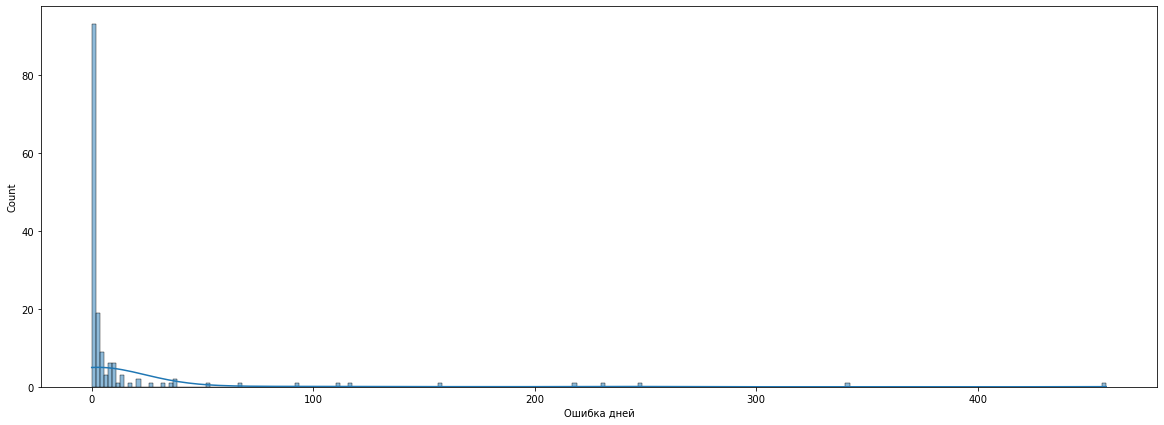

In [11]:
fig, ax = plt.subplots(figsize=(20,7))
sns.histplot(data=df_rez,
            x='Ошибка дней',
            # log_scale=True, #log от 0 найти нельзя :-(
            kde=True,
            ax=ax);

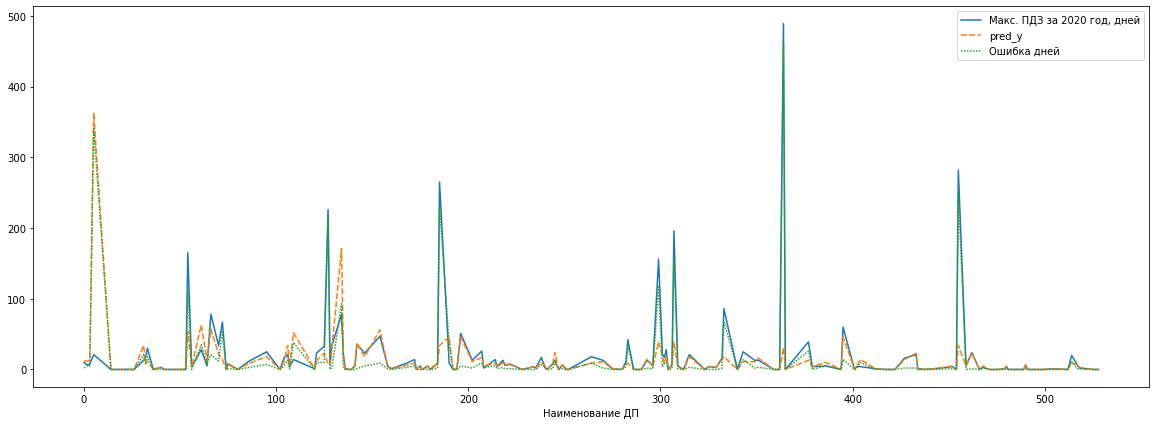

In [12]:
fig, ax = plt.subplots(figsize=(20,7))
# ax.set(yscale="log") #xscale="log", 
sns.lineplot(data=df_rez[['Макс. ПДЗ за 2020 год, дней',
                         'pred_y',
                         'Ошибка дней']],
            # x=df_rez.index,
            # y='Ошибка дней',
            ax=ax);


### Качество прогнозов по категориям
- факт просрочки;
- просрочку более 30 дней;
- просрочку в диапазоне от 60 до 90 дней?

In [13]:
df_data_perd3 = pd.DataFrame()
df_data_perd3['Факт просрочки'] = df_rez['Макс. ПДЗ за 2020 год, дней'] > 0
df_data_perd3['Просрочка > 30 дней'] = df_rez['Макс. ПДЗ за 2020 год, дней'] > 30
df_data_perd3['Просрочка от 30 до 60 дней'] = ((df_rez['Макс. ПДЗ за 2020 год, дней'] >= 30) 
                                            & (df_rez['Макс. ПДЗ за 2020 год, дней'] <= 60))
df_pred_perd3 = pd.DataFrame()
df_pred_perd3['Факт просрочки'] = df_rez['pred_y'] > 0
df_pred_perd3['Просрочка > 30 дней'] = df_rez['pred_y'] > 30
df_pred_perd3['Просрочка от 30 до 60 дней'] = ((df_rez['pred_y'] >= 30) 
                                            & (df_rez['pred_y'] <= 60))
print('Точность предсказания:')
100/df_rez.shape[0] * (df_data_perd3 == df_pred_perd3).sum()

Точность предсказания:


Факт просрочки                100.000000
Просрочка > 30 дней            91.823899
Просрочка от 30 до 60 дней     89.937107
dtype: float64